# Feynman sum of paths: circuit analysis

### Definition of the demo circuit


In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.24.0', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': '0.5.0', 'qiskit-machine-learning': '0.6.1'}

In [2]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit import Aer

import warnings

from circuit_generator import get_circuit

In [3]:
import random
import math
import numpy as np

import csv
import os.path

In [6]:
# define the input state (X=|0>) and the final state (Y=|t>)
X = 0  # changing X has no effct in the Qiskit simulation
Y = 0

# Parameterize this execution: circuitID
circuitID = 196

######## 3x3 trivial circuit
if circuitID == 1:
    n= 3
    true_amplitude = 0.353553+0.000000j
    qc, num_qubits, layers, num_layers = get_circuit (circuitID, n)


######## 4x4 highly branching circuit
elif circuitID == 2:
    n= 4
    true_amplitude = 0.353553+0.000000j
    qc, num_qubits, layers, num_layers = get_circuit (circuitID, n)

######## n x n Hadamards circuit
elif circuitID == 3:
    n= 3
    true_amplitude = 0.35355339+0.00000000j
    qc, num_qubits, layers, num_layers = get_circuit (circuitID, n)

####### circuits 4 : different numbers of Hadamard: see 3

######## 4 x 4 Hadamards Ss Hadamards circuit
elif circuitID == 5:
    n= 4
    true_amplitude = 0.250000-0.000000j
    qc, num_qubits, layers, num_layers = get_circuit (circuitID, n)
######## 1 x 4 Hadamards Ts Hadamards circuit
elif circuitID == 51:
    n= 1
    true_amplitude = 0.70710678-0.0000j
    qc, num_qubits, layers, num_layers = get_circuit (circuitID, n)
######## 2 x 4 Hadamards Ts Hadamards circuit
elif circuitID == 52:
    n= 2
    true_amplitude = 0.50000000+0.00000000j
    qc, num_qubits, layers, num_layers = get_circuit (circuitID, n)


######## 4 x 4 Hadamards Ts Hadamards circuit
elif circuitID == 6:
    n= 4
    true_amplitude = 0.250000-0.000000j
    qc, num_qubits, layers, num_layers = get_circuit (circuitID, n)
######## 1 x 4 Hadamards Ts Hadamards circuit
elif circuitID == 61:
    n= 1
    true_amplitude = 0.70710678-0.0000j
    qc, num_qubits, layers, num_layers = get_circuit (circuitID, n)
######## 2 x 4 Hadamards Ts Hadamards circuit
elif circuitID == 62:
    n= 2
    true_amplitude = 0.50000000+0.00000000j
    qc, num_qubits, layers, num_layers = get_circuit (circuitID, n)



######## variational EfficientSU2
elif circuitID == 19:
    n= 3
    reps = 1
    true_amplitude = 0.07304992+0.01779798j
    qc, num_qubits, layers, num_layers = get_circuit (circuitID, n, reps)

######## deeper variational EfficientSU2
elif circuitID == 191:
    n= 3
    reps = 2
    true_amplitude = 0.07304992+0.01779798j
    qc, num_qubits, layers, num_layers = get_circuit (19, n, reps)

######## wider and deeper variational EfficientSU2
elif circuitID == 192:
    n= 4
    reps = 2
    true_amplitude = 0.06600214-0.21540996j
    # there are 176 non zero paths
    qc, num_qubits, layers, num_layers = get_circuit (19, n, reps)

######## wider variational EfficientSU2
elif circuitID == 193:
    n= 5
    reps = 1
    true_amplitude = -0.00172150+0.00127863j
    # there are 24 non zero paths
    qc, num_qubits, layers, num_layers = get_circuit (19, n, reps)

######## wider 6 variational EfficientSU2
elif circuitID == 194:
    n= 6
    reps = 1
    true_amplitude = -0.00273768-0.00909492j
    # there are  non zero paths
    qc, num_qubits, layers, num_layers = get_circuit (19, n, reps)
######## deeper and larger variational EfficientSU2
elif circuitID == 195:
    n= 6
    reps = 2
    true_amplitude = -0.00514611-0.02104634j
    qc, num_qubits, layers, num_layers = get_circuit (19, n, reps)
######## deeper and larger variational EfficientSU2
elif circuitID == 196:
    n= 15
    reps = 2
    true_amplitude = -0.00514611-0.02104634j
    qc, num_qubits, layers, num_layers = get_circuit (19, n, reps)

######## random circuit
elif circuitID == 21: 
    n = 6
    depth = 5
    #Y = 16
    Y = 27

    true_amplitude = 0.226961+0.064374j
    qc, num_qubits, layers, num_layers = get_circuit (circuitID, n, depth)
######## larger random circuit
elif circuitID == 211: 
    n = 7
    depth = 5
    #Y = 16
    Y = 8

    true_amplitude = 0.05430381+0.00497732j
    qc, num_qubits, layers, num_layers = get_circuit (21, n, depth)

######## larger random circuit
elif circuitID == 212: 
    n = 8
    depth = 5
    Y = 16

    true_amplitude = 0.00183663+0.00049823j
    qc, num_qubits, layers, num_layers = get_circuit (21, n, depth)

######## larger random circuit
elif circuitID == 213: 
    n = 9
    depth = 5
    #Y = 16
    Y = 321

    true_amplitude = -0.018330+0.074981j
    qc, num_qubits, layers, num_layers = get_circuit (21, n, depth)
    
######## wider random circuit
elif circuitID == 214: 
    n = 15
    depth = 4
    #Y = 16
    Y = 2112

    # 16 non zero paths
    true_amplitude = 0.00000669+0.00001043j
    qc, num_qubits, layers, num_layers = get_circuit (21, n, depth)

######## random circuit Clifford+T
elif circuitID == 23: 
    n = 6
    depth = 5
    Hpercent = 0.4

    qc, num_qubits, layers, num_layers = get_circuit (circuitID, n, depth, Hpercent)
######## random circuit Clifford+T
elif circuitID == 231: 
    n = 15
    depth = 8
    Hpercent = 0.4
    Y = 3
    true_amplitude = 0.01333677-0.00552427j

    qc, num_qubits, layers, num_layers = get_circuit (23, n, depth, Hpercent)

########### IQP
elif circuitID == 22:
    n= 4
    true_amplitude = 0.250000+0.000000j
    qc, num_qubits, layers, num_layers = get_circuit (circuitID, n)

######## 2 x 4 Hadamards Ts Hadamards circuit
elif circuitID == 100:
    n= 2
    true_amplitude = 0.250000-0.000000j
    qc, num_qubits, layers, num_layers = get_circuit (circuitID)
######## 2 x 3 Hadamards  circuit
elif circuitID == 101:
    qc, num_qubits, layers, num_layers = get_circuit (circuitID)
######## 2 x 3 Hadamards  circuit
elif circuitID == 102:
        Y = 1
        qc, num_qubits, layers, num_layers = get_circuit (circuitID)
elif circuitID == 103:
    X=1
    Y = 1
    qc, num_qubits, layers, num_layers = get_circuit (circuitID)

#n= 16
#true_amplitude = -0.004633-0.000102j


#circuitID = 20
#qc, num_qubits, layers, num_layers = get_circuit (circuitID)
#circuitID = 14
#qc, num_qubits, layers, num_layers = get_circuit (circuitID)



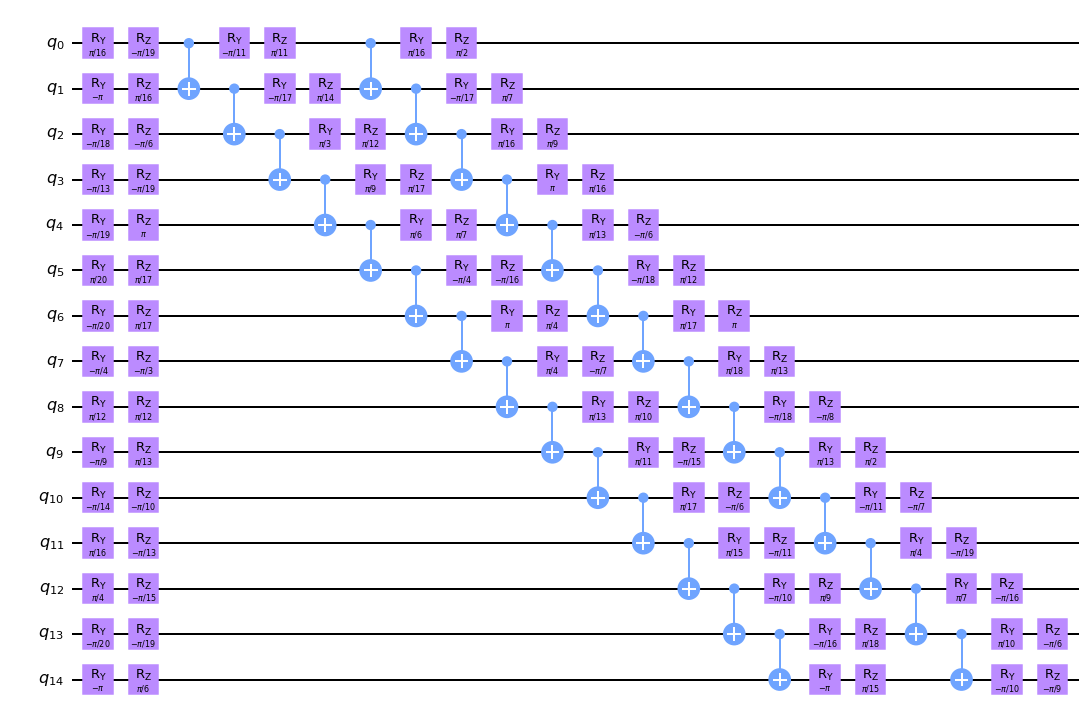

In [7]:

# draw the circuit

qc.draw('mpl')

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt


def plot_visited_states (non_zero_paths_ndx, N, num_layers, X, Y):
    

    length = num_layers+1
    positionsX = np.empty ((N,length), dtype=int)
    positionsY = np.empty ((N,length), dtype=int)
    freqs = np.zeros ((N,length))
    
    XXvalues = range(length)
    
    for r in range(int(N)):
        positionsX[r] = np.array(XXvalues)
        positionsY[r].fill(r)

    positionsX = positionsX.flatten()
    positionsY = positionsY.flatten()
    
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    fig.suptitle("Path space distribution over states", size=14)

    visited_paths = set()
    for ndx in non_zero_paths_ndx:
        # input state
        freqs[X][0] += 1
        path = my_hash_inverse (ndx, N, num_layers-1)

        for layer, state in enumerate(path):
            freqs[state][layer+1] += 1
        # output state
        freqs[Y][num_layers] += 1
        
        if ndx not in visited_paths:
            visited_paths.add(ndx)
            ax.plot (XXvalues, np.asarray([X]+[state for state in path]+[Y]), 'c')

    print ("{0} non-zero paths".format(len(visited_paths)))
    freqs = freqs.flatten()
    normalize = np.max(freqs)
    if normalize != 0.:
        freqs /= normalize 
    freqs *= 250.
           
    plt.scatter(positionsX, positionsY, freqs, color='g')
    
    plt.xticks (XXvalues)
    n_qubits = int(math.log2(N))
    YY = [0] + [2**exp for exp in range(n_qubits)] + [2**(n_qubits)-1]
    plt.yticks (YY)
    plt.gca().invert_yaxis()

    ax.set_xlabel("layer")
    ax.set_ylabel("state")

    plt.show()
    return

In [9]:
# Parameterize this execution: circuitID

# compute the relevant constants for the demo circuit defined above

# compute the number of basis states
N = 2**num_qubits
print ("{0} qubits ({1} basis states); {2} layers".format(num_qubits,N,num_layers))

# compute the total number of paths
P = 2**(num_qubits*(num_layers-1))
if (P>9999):
    print ('{0:.3e} total existing paths!'.format(P))
else:
    print ('{0} total existing paths!'.format(P))


15 qubits (32768 basis states); 22 layers
6.675e+94 total existing paths!


### Validation with Qiskit

For the sake of validation simulation is performed using Qiskit statevector simulator.
Estimates can later be verified against the $t^{th}$ entry of `my_statevector`

In [10]:
backend = Aer.get_backend('statevector_simulator')

# Launch the job
job_sim = backend.run(qc, shots=1)
    
# Grab the results from the job.
result_sim = job_sim.result()

y = result_sim.get_statevector(qc, decimals=8)
#print(outputstate)
    
print()
# Prepare a my_statevector with all states sorted and real part only
my_statevector = {}
sv_dict = y.to_dict()
#print (sv_dict)
format_str = '{{0:0{0}b}}'.format(num_qubits)
for i in range(2**num_qubits):
    bin_str = format_str.format(i)
    if bin_str in sv_dict:
        my_statevector[bin_str] = sv_dict[bin_str]
    else:
        my_statevector[bin_str] = 0.
for key in my_statevector:
    if abs(my_statevector[key])>1.e-5:
        print ('{0} : {1:.8f}'.format(key,my_statevector[key]))




000000000000000 : 0.00364578+0.00060584j
000000000000001 : 0.00211857+0.00642815j
000000000000010 : 0.08250713+0.00487868j
000000000000011 : -0.00077962+0.00529920j
000000000000100 : -0.00028799+0.00048592j
000000000000101 : 0.00018798+0.00261172j
000000000000110 : 0.01639431+0.00323429j
000000000000111 : 0.00116712+0.00104606j
000000000001000 : -0.00063201-0.00000152j
000000000001001 : -0.00006990-0.00002423j
000000000001010 : -0.01089890-0.00350416j
000000000001011 : -0.00113219+0.00077109j
000000000001100 : 0.00217354-0.00017115j
000000000001101 : 0.00165426-0.00588817j
000000000001110 : -0.02659973-0.00569572j
000000000001111 : -0.00064437-0.00171943j
000000000010000 : -0.00089068+0.00163756j
000000000010001 : -0.00348996-0.00014955j
000000000010010 : -0.01718615+0.03912343j
000000000010011 : -0.00260560-0.00134588j
000000000010100 : -0.00058720+0.00001825j
000000000010101 : -0.00137355+0.00072995j
000000000010110 : -0.00547333+0.00841372j
000000000010111 : -0.00175217+0.00405921j

In [11]:

# save to CSV
save2CSV = True

if save2CSV:
    Path = "../circuits/"+ str(circuitID) + "/"
    filename = Path + "circuit_" + str(circuitID) + ".csv"

    # Does the file exists ?
    # If not write headers and circuit data
    if not os.path.isfile(filename):
        header = ['circuitID', 'qubits', 'psi0'] + [str(i//2)+'r'if i%2==0 else str(i//2)+'i' for i in range(2**(num_qubits+1)) ]
        with open(filename, 'w') as f:
            writer = csv.writer(f)

            # write the header
            writer.writerow(header)

    # append the new row
    with open(filename, 'a') as f:
        writer = csv.writer(f)

        row = [circuitID, num_qubits, X] 
        for key in my_statevector:
            row.append(my_statevector[key].real)
            row.append(my_statevector[key].imag)
        writer.writerow(row)
            


#### Print the correct amplitude (evaluated above by the Qiskit simulator) for verification purposes


In [12]:
# print the exact amplitude to be computed (from the statevector sim)
format_str = '{{0:0{0}b}}'.format(num_qubits)
final_bin_str = format_str.format(Y)
initial_bin_str = format_str.format(X)
true_amplitude = my_statevector[final_bin_str]
#true_amplitude = None
print ('FINAL STATE {0} = \'{1}\' (<{0} | U | {3}>): {2:f}'.format(Y, final_bin_str, true_amplitude,X))

FINAL STATE 0 = '000000000000000' (<0 | U | 0>): 0.003646+0.000606j


### Running the simulation


In [ ]:
from BruteForceFeynmanSum import BruteForcePDF

# Importing complex mean and variance functions
from complex_mean_variance import c_mean, c_var_true_mean
from hash_paths import my_hash_inverse

In [ ]:
    
amplitude, amplitudes, pdfs, non_zero_paths_ndx = BruteForcePDF (num_qubits, num_layers, layers, 
                                    initial_bin_str, final_bin_str, P, N)
    
non_zero_paths = len(non_zero_paths_ndx)

# hopw many non zero pdf paths
non_zero_pdf_paths = sum(1 for p in pdfs if p > 0)
    
print ('<{0}| U |{2}> ~ {1:.8f}'.format(Y,amplitude,X))
EPSILON = 1e-3
if (abs(amplitude.real - my_statevector[final_bin_str].real) < EPSILON and
    abs(amplitude.imag - my_statevector[final_bin_str].imag) < EPSILON):
    success= True
else:
    success = False
if success:
    print ("SUCCESS: state vec amp equal to Feynman amp!")
else:
    print ("ERROR: state vec amp != Feynman amp!")
print ("State vec amp {0:.8f} ; Feynman amp {1:.8f} !".format(my_statevector[final_bin_str], amplitude))
print ("There are {0} contributing paths!".format(non_zero_paths))
print ("There are {0} non zero probability paths!".format(non_zero_pdf_paths))
#non_zero_paths_np = np.empty((non_zero_paths,num_layers+1), dtype=int) 
#if non_zero_paths>0:
#    print ("Non zero paths are:")
#    for i, ndx in enumerate(non_zero_paths_ndx):
#        print ('{0} : {1}'.format(ndx,X), end= ' ')
#        path = my_hash_inverse (ndx, N, num_layers-1)
#        for p in path:
#            print (p, end= ' ')
#        print (Y, end = ' ')
#        print ('amplitude={0}'.format(amplitudes[ndx]))
#        #non_zero_paths_np[i] = np.asarray([X] + list(path) + [Y])
#    print ()

## print amplitudes
#print(amplitudes)
#print()
    
## print PDFs
#print(pdfs)
#print()

## plot non zero stats
#plot_visited_states (non_zero_paths_ndx, N, num_layers, X, Y)
   

In [ ]:
 
# save to CSV
Path = "../circuits/"+ str(circuitID) + "/"
filename = Path + "circuit_" + str(circuitID) + "-raw-values.csv"
header1 = ['circuitID', 'psi_init', 'psi_final', 'amplitude', 'qubits', 'layers', 'paths', 'non zero paths', 'non zero pdf paths']
header2 = ['ndx', 'throughput', 'pdf']
with open(filename, 'w') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header1)
    row = [circuitID, X, Y, amplitude, num_qubits, num_layers, P, non_zero_paths, non_zero_pdf_paths]
    writer.writerow(row)
    # write the header
    writer.writerow(header2)
    #ndx = 0
    #while (ndx < len(amplitudes)):
    i = 0
    while (i < non_zero_paths):
        ndx = non_zero_paths_ndx[i]
        row = [ndx, amplitudes[ndx], pdfs[ndx]]
        # write the data
        writer.writerow(row)
        i += 1
            
f.close()


if (P>9999):
    print ('The circuit entails a total of {0:.3e} paths for <{1} | U | {2}>!'.format(P, Y, X))
else:
    print ('The circuit entails a total of {0} paths for <{1} | U | {2}>!'.format(P, Y, X))

print ('Correct amplitude = ', my_statevector[final_bin_str])

    